In [1]:
from collections import defaultdict
from HW3Utils import *
from math import log

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def train(messages):
    classes_count = defaultdict(lambda:0)
    words_count = defaultdict(lambda:0)

    total_words = 0
    for message in messages:
        label = 0 if message.isSpam() else 1
        classes_count[label] += len(message.getAllWords())
        total_words += len(message.getAllWords())
        for word in message.getAllWords():
            words_count[label, word] += 1
    for c, word in words_count:
        words_count[c, word] /= ((0 if words_count.get((0, word)) is None else words_count.get((0, word))) + \
                                 (0 if words_count.get((1, word)) is None else words_count.get((1, word))))
    for c in classes_count:
        classes_count[c] /= total_words
    return classes_count, words_count

In [3]:
def classify(probabilities, message, trust_level = 0):
    classes_count, words_count = probabilities
    result = [0] * len(classes_count)
    for i in range(len(classes_count)):
        result[i] = log(classes_count[i])
        for word in message.getAllWords():
            if words_count[i, word] != 0:
                result[i] += log(words_count[i, word])
    return 0 if log(result[0] / result[1]) > trust_level else 1  # for fn minimalization trust_level = 0.5 is ok

In [4]:
messages = getData()

averageAccuracy = 0
x = []
y = []
for trust_level in np.arange(-1.1, 1.1, 0.2):
    print('Trust level:', trust_level)
    x_average = 0
    y_average = 0
    for i in range(10):
        train_messages = []
        test_messages = []
        for message in messages:
            if message.getFold() == i:
                test_messages.append(message)
            else:
                train_messages.append(message)
        probabilities = train(train_messages)
        answ = []
        for message in test_messages:
            answ.append(classify(probabilities, message, trust_level))
        accuracy, tp, tn, fp, fn = f1_score(answ, [msg.isSpam() for msg in test_messages])
        x_average += fp / (fp + tn)
        y_average += tp / (tp + fn)
        averageAccuracy += accuracy
#         print(accuracy) #, fn
    averageAccuracy /= 10
    x.append(x_average / 10)
    y.append(y_average / 10)
    print('Average:', averageAccuracy)

Trust level: -1.1
Average: 0.32333498670434374
Trust level: -0.9
Average: 0.5361174468191645
Trust level: -0.7
Average: 0.7062593333666762
Trust level: -0.5
Average: 0.819392588408558
Trust level: -0.3
Average: 0.8863169078175709
Trust level: -0.1
Average: 0.8883637080594763
Trust level: 0.1
Average: 0.865747143393676
Trust level: 0.3
Average: 0.8256763945531083
Trust level: 0.5
Average: 0.8014300026694097
Trust level: 0.7
Average: 0.759909094315215
Trust level: 0.9
Average: 0.7317665267212461


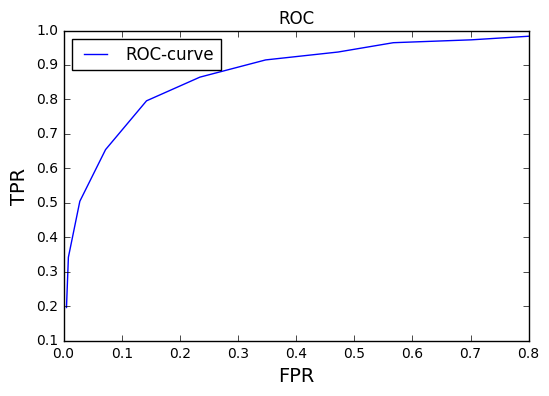

In [5]:
fig, ax = plt.subplots()

ax.plot(x, y, label=r"ROC-curve")
ax.set_xlabel(r'FPR', fontsize=14)
ax.set_ylabel(r'TPR', fontsize=14)
ax.set_title('ROC')
ax.legend(loc=2)

plt.show()